# Final Project Submission

Please fill out:
* Student name: Hsin Chao
* Student pace: Full time
* Scheduled project review date/time: 03/09/2020
* Instructor name: Sean
* Blog post URL:


In [167]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import credit_functions
import xgboost as xgb
from sklearn.metrics import mean_squared_error, accuracy_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, KFold
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
import random
from tabulate import tabulate
from xgboost import plot_tree
from xgboost import plot_importance
from sklearn.datasets import load_iris

pd.set_option('display.max_columns',300)
pd.set_option('display.max_rows',300)

## Data Cleaning

In [79]:
# read data
dfold=pd.read_csv('Medium.csv')
dfold.head()

,audioVersionDurationSec,codeBlock,codeBlockCount,collectionId,createdDate,createdDatetime,firstPublishedDate,firstPublishedDatetime,imageCount,isSubscriptionLocked,language,latestPublishedDate,latestPublishedDatetime,linksCount,postId,readingTime,recommends,responsesCreatedCount,socialRecommendsCount,subTitle,tagsCount,text,title,totalClapCount,uniqueSlug,updatedDate,updatedDatetime,url,vote,wordCount,publicationdescription,publicationdomain,publicationfacebookPageName,publicationfollowerCount,publicationname,publicationpublicEmail,publicationslug,publicationtags,publicationtwitterUsername,tag_name,slug,name,postCount,author,bio,userId,userName,usersFollowedByCount,usersFollowedCount,scrappedDate
0,0,NaN,0.0,638f418c8464,2018-09-18,2018-09-18 20:55:34,2018-09-18,2018-09-18 20:57:03,1,False,en,2018-09-18,2018-09-18 20:58:20,1,10007d3018fe,0.958491,2,0,0,A major private IT company implements blockcha...,5,"Private Business, Government and Blockchain\n\...","Private Business, Government and Blockchain",100,private-business-government-and-blockchain-100...,2018-09-18,2018-09-18 20:58:20,https://medium.com/s/story/private-business-go...,False,201,ICOBox is the first and the biggest new genera...,NaN,icobox.io,NaN,ICOBox,support@icobox.io,icobox-io,"BLOCKCHAIN,ICO,ETHEREUM,ETHEREUM BLOCKCHAIN,TO...",icobox_io,Blockchain,blockchain,Blockchain,265164.0,Anar Babaev,NaN,f1ad85af0169,babaevanar,450.0,404.0,20181104
1,0,NaN,0.0,638f418c8464,2018-09-18,2018-09-18 20:55:34,2018-09-18,2018-09-18 20:57:03,1,False,en,2018-09-18,2018-09-18 20:58:20,1,10007d3018fe,0.958491,2,0,0,A major private IT company implements blockcha...,5,"Private Business, Government and Blockchain\n\...","Private Business, Government and Blockchain",100,private-business-government-and-blockchain-100...,2018-09-18,2018-09-18 20:58:20,https://medium.com/s/story/private-business-go...,False,201,ICOBox is the first and the biggest new genera...,NaN,icobox.io,NaN,ICOBox,support@icobox.io,icobox-io,"BLOCKCHAIN,ICO,ETHEREUM,ETHEREUM BLOCKCHAIN,TO...",icobox_io,Samsung,samsung,Samsung,5708.0,Anar Babaev,NaN,f1ad85af0169,babaevanar,450.0,404.0,20181104
2,0,NaN,0.0,638f418c8464,2018-09-18,2018-09-18 20:55:34,2018-09-18,2018-09-18 20:57:03,1,False,en,2018-09-18,2018-09-18 20:58:20,1,10007d3018fe,0.958491,2,0,0,A major private IT company implements blockcha...,5,"Private Business, Government and Blockchain\n\...","Private Business, Government and Blockchain",100,private-business-government-and-blockchain-100...,2018-09-18,2018-09-18 20:58:20,https://medium.com/s/story/private-business-go...,False,201,ICOBox is the first and the biggest new genera...,NaN,icobox.io,NaN,ICOBox,support@icobox.io,icobox-io,"BLOCKCHAIN,ICO,ETHEREUM,ETHEREUM BLOCKCHAIN,TO...",icobox_io,It,it,It,3720.0,Anar Babaev,NaN,f1ad85af0169,babaevanar,450.0,404.0,20181104
3,0,NaN,0.0,NaN,2018-01-07,2018-01-07 17:04:37,2018-01-07,2018-01-07 17:06:29,13,False,en,2018-01-07,2018-01-07 17:18:38,24,1000c43bcb97,19.716981,0,0,0,Introduction,5,EPQ draft 1 (4844 words)\nhttps://upload.wikim...,EPQ draft 1 (4844 words),0,introduction-3-1000c43bcb97,2018-01-07,2018-01-07 17:18:39,https://medium.com/s/story/introduction-3-1000...,False,4854,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Technology,technology,Technology,166125.0,George Sykes,NaN,93b9e94f08ca,tasty231,6.0,22.0,20181104
4,0,NaN,0.0,NaN,2018-01-07,2018-01-07 17:04:37,2018-01-07,2018-01-07 17:06:29,13,False,en,2018-01-07,2018-01-07 17:18:38,24,1000c43bcb97,19.716981,0,0,0,Introduction,5,EPQ draft 1 (4844 words)\nhttps://upload.wikim...,EPQ draft 1 (4844 words),0,introduction-3-1000c43bcb97,2018-01-07,2018-01-07 17:18:39,https://medium.com/s/story/introduction-3-1000...,False,4854,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robotics,robotics,Robotics,9103.0,George Sykes,NaN,93b9e94f08ca,tasty231,6.0,22.0,20181104


In [3]:
# check shape
dfold.shape

(279577, 50)

In [4]:
# check columns 
dfold.columns

Index(['audioVersionDurationSec', 'codeBlock', 'codeBlockCount',
       'collectionId', 'createdDate', 'createdDatetime', 'firstPublishedDate',
       'firstPublishedDatetime', 'imageCount', 'isSubscriptionLocked',
       'language', 'latestPublishedDate', 'latestPublishedDatetime',
       'linksCount', 'postId', 'readingTime', 'recommends',
       'responsesCreatedCount', 'socialRecommendsCount', 'subTitle',
       'tagsCount', 'text', 'title', 'totalClapCount', 'uniqueSlug',
       'updatedDate', 'updatedDatetime', 'url', 'vote', 'wordCount',
       'publicationdescription', 'publicationdomain',
       'publicationfacebookPageName', 'publicationfollowerCount',
       'publicationname', 'publicationpublicEmail', 'publicationslug',
       'publicationtags', 'publicationtwitterUsername', 'tag_name', 'slug',
       'name', 'postCount', 'author', 'bio', 'userId', 'userName',
       'usersFollowedByCount', 'usersFollowedCount', 'scrappedDate'],
      dtype='object')

In [5]:
# drop unnecessary columns
dfold.drop(columns=['audioVersionDurationSec', 'codeBlock','collectionId', 'createdDate', 'createdDatetime', 'firstPublishedDate',
       'firstPublishedDatetime',  'isSubscriptionLocked',
       'language', 'latestPublishedDate', 'latestPublishedDatetime',
       'postId', 'socialRecommendsCount', 'subTitle',
        'text', 'title',  'uniqueSlug',
       'updatedDate', 'updatedDatetime', 'url',  
       'publicationdescription', 'publicationdomain','vote',
       'publicationfacebookPageName', 'publicationfollowerCount',
       'publicationname', 'publicationpublicEmail', 'publicationslug',
       'publicationtags', 'publicationtwitterUsername', 'tag_name', 'slug',
       'name',  'author', 'bio', 'userId', 'userName',
     'scrappedDate'], inplace=True)

In [7]:
# ramdomly select 100000 observations to build model
df = dfold.sample(n=100000, replace=False, random_state=10)

In [9]:
# np.random.seed(99)
# np.random.randint(0,10)

In [10]:
# remove outliers
df=df[df['codeBlockCount']<250]
df=df[df['imageCount']<120]
df=df[df['linksCount']<300]
df=df[df['readingTime']<80]
df=df[df['recommends']<10000]
df=df[df['responsesCreatedCount']<500]
df=df[df['totalClapCount']<50000]
df=df[df['usersFollowedCount']<60000]

In [12]:
# create depedent variable 'popular'
df['popular']=0

In [14]:
# assign values to bin 'popular' column properly
df.popular =np.where((df['recommends'].values > 8) & (df['totalClapCount'].values > 72), 1, 0)

In [15]:
# check value counts
df.popular.value_counts()

0    80201
1    19754
Name: popular, dtype: int64

In [16]:
# final dataframe
df

,codeBlockCount,imageCount,linksCount,readingTime,recommends,responsesCreatedCount,tagsCount,totalClapCount,wordCount,postCount,usersFollowedByCount,usersFollowedCount,popular
131864,0.0,0,0,0.928302,0,0,3,0,246,66154.0,238.0,10.0,0
249381,0.0,31,9,4.598113,28,2,5,129,609,66154.0,2388.0,165.0,1
60121,0.0,2,16,5.764465,2,0,5,4,1426,33617.0,120.0,54.0,0
45161,0.0,2,2,2.379560,1,0,5,2,529,69291.0,1.0,3.0,0
137601,0.0,4,12,7.447170,11,0,5,78,1788,153000.0,420.0,165.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
112986,0.0,2,14,3.341824,3,0,5,12,784,66154.0,32.0,35.0,0
109562,6.0,5,10,2.497484,9,0,5,158,441,66154.0,33.0,0.0,1
188462,0.0,1,2,3.683019,0,0,5,0,923,357.0,37.0,37.0,0
160419,0.0,2,2,2.888994,1,0,5,1,664,5142.0,52.0,46.0,0


In [17]:
# double check if there is any missing value
df.isna().sum()

codeBlockCount           0
imageCount               0
linksCount               0
readingTime              0
recommends               0
responsesCreatedCount    0
tagsCount                0
totalClapCount           0
wordCount                0
postCount                0
usersFollowedByCount     0
usersFollowedCount       0
popular                  0
dtype: int64

## EDA

In [18]:
# dataframe describe
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
codeBlockCount,99955.0,1.221450,6.570372,0.000000,0.000000,0.000000,0.000000,204.000000
imageCount,99955.0,3.737992,5.159124,0.000000,1.000000,2.000000,5.000000,106.000000
linksCount,99955.0,6.820019,10.006583,0.000000,1.000000,4.000000,9.000000,267.000000
readingTime,99955.0,4.089927,3.505180,0.003774,1.992453,3.274528,5.141667,74.424528
recommends,99955.0,24.941073,188.649407,0.000000,0.000000,2.000000,8.000000,9933.000000
responsesCreatedCount,99955.0,0.840058,5.786225,0.000000,0.000000,0.000000,0.000000,342.000000
tagsCount,99955.0,4.615357,0.829266,1.000000,5.000000,5.000000,5.000000,6.000000
totalClapCount,99955.0,171.596498,1168.290891,0.000000,0.000000,8.000000,72.000000,49838.000000
wordCount,99955.0,935.463138,867.500842,0.000000,426.500000,734.000000,1178.000000,19378.000000
postCount,99955.0,43782.013076,61003.667535,0.000000,2642.000000,22833.000000,59190.000000,331914.000000


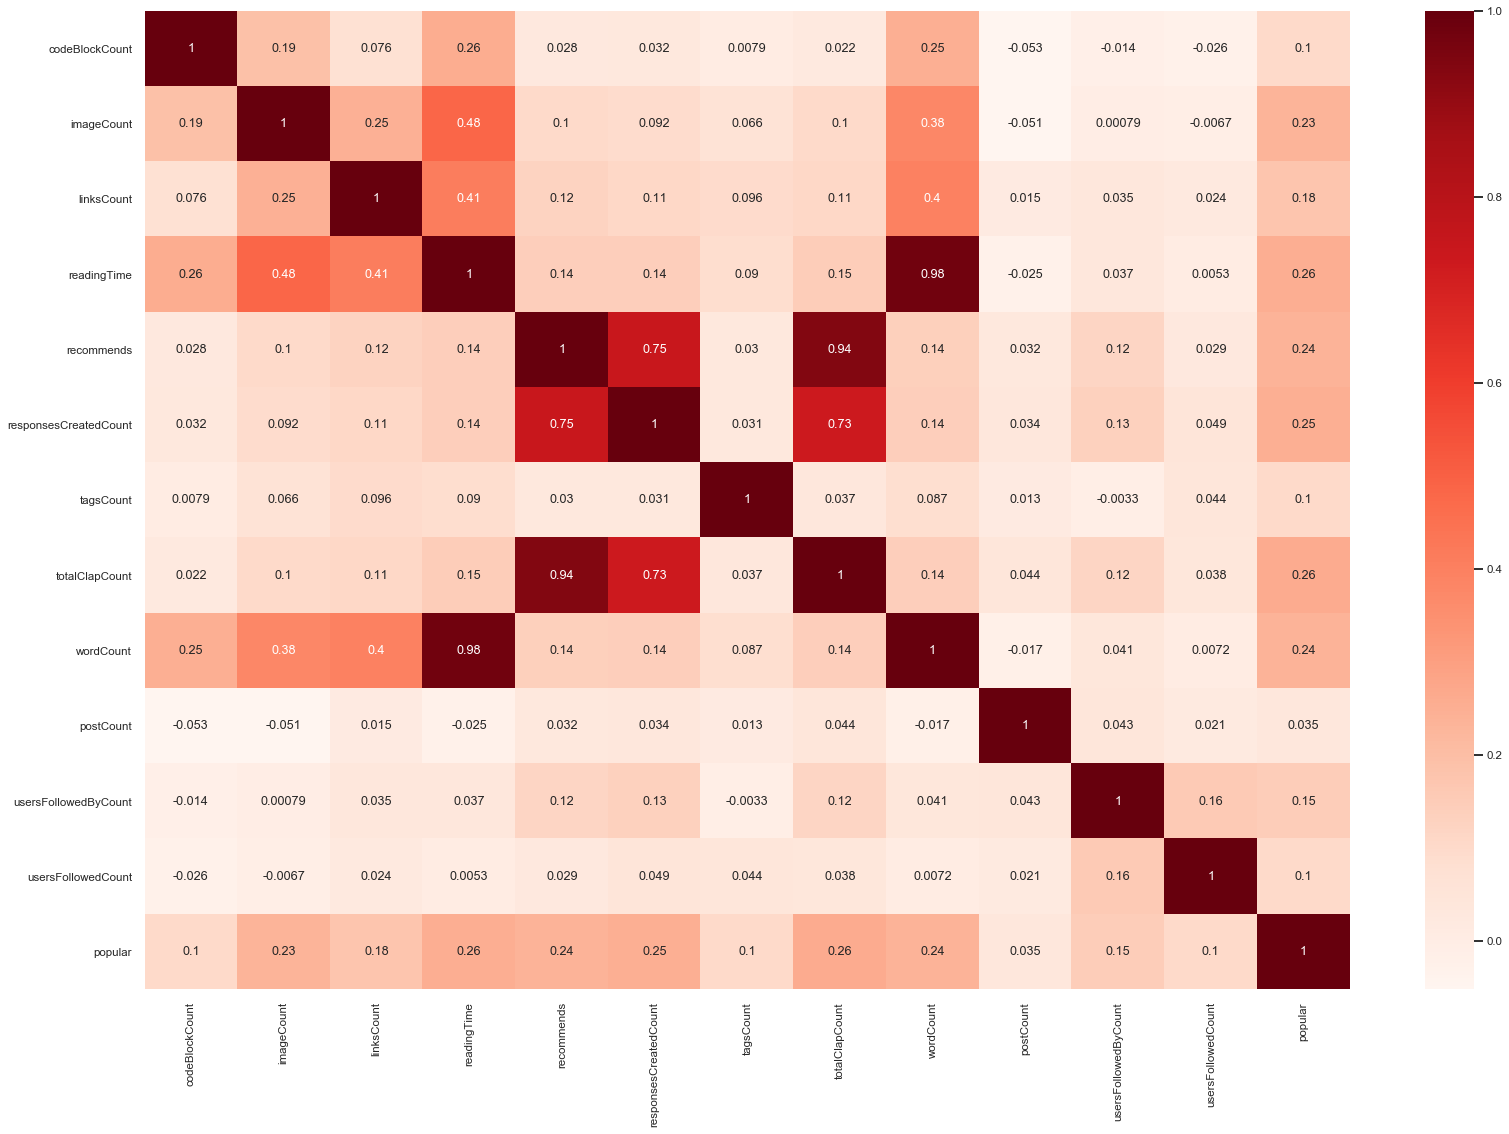

In [19]:
# correlation EDA for each column
sns.set(rc = {'figure.figsize':(27,18)})
sns.set_context('talk' , font_scale=0.7)
sns.heatmap(df.corr(),cmap='Reds' , annot=True)

In [20]:
# check column 'recommends' value
df['recommends'].value_counts().to_string().split('\n')

['0       28715',
 '1       15183',
 '2        9273',
 '3        6224',
 '4        4853',
 '5        3686',
 '6        2868',
 '7        2479',
 '8        2030',
 '9        1832',
 '10       1565',
 '11       1342',
 '12       1066',
 '14        900',
 '13        877',
 '16        761',
 '15        738',
 '17        599',
 '18        577',
 '20        515',
 '19        494',
 '21        481',
 '24        430',
 '22        416',
 '25        389',
 '23        389',
 '27        366',
 '26        326',
 '28        291',
 '29        253',
 '31        248',
 '30        235',
 '35        228',
 '34        220',
 '33        218',
 '32        209',
 '37        177',
 '43        171',
 '38        171',
 '36        168',
 '40        156',
 '39        154',
 '45        142',
 '44        140',
 '42        126',
 '46        126',
 '41        122',
 '47        120',
 '54        104',
 '53        102',
 '51        100',
 '58         98',
 '49         97',
 '50         96',
 '48         91',
 '52      

In [21]:
# set bin for recommends 
listy=[]
for i in df['recommends']:
    if i>0 and i<=5:
        i=1
        listy.append(i)
    elif i>5 and i<=10:
        i=2
        listy.append(i)
    elif i>10 and i<=100:
        i=3
        listy.append(i)
    elif i>100:
        i=4
        listy.append(i)
    else:
        i=0
        listy.append(i)

In [22]:
# replace recommend column by new bins
df['recommends']=listy

In [23]:
# check new recommend column value counts
df['recommends'].value_counts()

1    39219
0    28715
3    17535
2    10774
4     3712
Name: recommends, dtype: int64

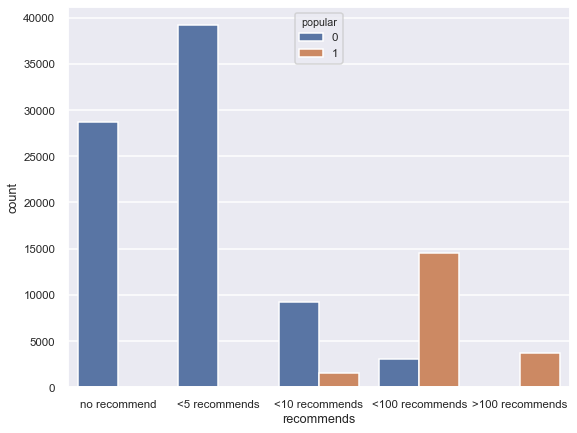

In [24]:
# EDA for recommends vs popular
sns.set(rc = {'figure.figsize':(9,7)})
sns.set_context('talk' , font_scale=0.7)
edu = sns.countplot(x = 'recommends'  ,hue='popular', data = df)
edu.set_xticklabels(['no recommend' , '<5 recommends' , '<10 recommends' , '<100 recommends','>100 recommends'])
plt.show()

In [116]:
# check how many popular/not popular counts in different recommends
not_popular = df.groupby(df['recommends'][df['popular']==0]).size()
popular = df.groupby(df['recommends'][df['popular']==1]).size()

In [118]:
# name variables to fit into table
not_popular.name = 'not_popular'
popular.name = 'popular'

In [123]:
# outter join two groupby to a table and provide probability for each case
table1=pd.merge(not_popular, popular, how='outer', on='recommends').fillna(0)
table1['not_popular(%)'] = round((table1['not_popular']/(table1['not_popular']+table1['popular']))*100 ,2)
table1['popular(%)'] = round((table1['popular']/(table1['not_popular']+table1['popular']))*100 ,2)
table1

,not_popular,popular,not_popular(%),popular(%)
recommends,,,,
0.0,28715.0,0.0,100.00,0.00
1.0,39219.0,0.0,100.00,0.00
2.0,9242.0,1532.0,85.78,14.22
3.0,3025.0,14510.0,17.25,82.75
4.0,0.0,3712.0,0.00,100.00


In [27]:
# check reading time relationships to popular
df.groupby('popular')['readingTime'].mean()

popular
0    3.646208
1    5.891420
Name: readingTime, dtype: float64

In [165]:
# check number of follwers relationships to popular
df.groupby('popular')['usersFollowedByCount'].mean()

popular
0     836.984352
1    5286.858864
Name: usersFollowedByCount, dtype: float64

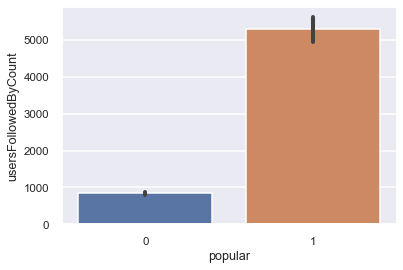

In [164]:
# EDA for number of follwers/number of following vs popular
# sns.barplot(y=df['usersFollowedCount'], x=df['popular'])
# plt.show()
sns.barplot(y=df['usersFollowedByCount'], x=df['popular'])
plt.show()

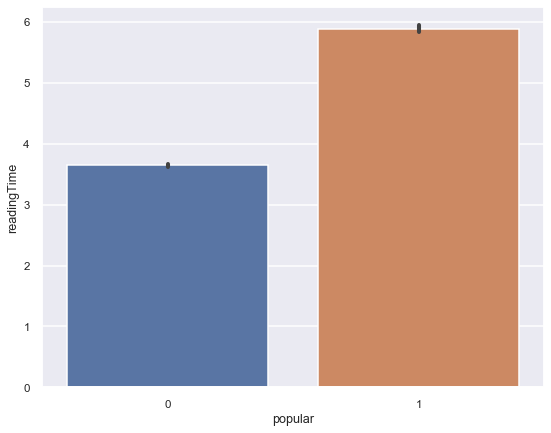

In [28]:
# EDA for reading time vs popular
sns.barplot(y=df['readingTime'], x=df['popular'])

In [29]:
# mean popular in each column
df.groupby("popular").mean()

,codeBlockCount,imageCount,linksCount,readingTime,recommends,responsesCreatedCount,tagsCount,totalClapCount,wordCount,postCount,usersFollowedByCount,usersFollowedCount
popular,,,,,,,,,,,,
0,0.891223,3.138739,5.949290,3.646208,0.832633,0.127156,4.573983,19.720290,833.442089,42709.570978,836.984352,223.547200
1,2.562165,6.170953,10.355169,5.891420,3.110357,3.734434,4.783335,788.212058,1349.667359,48136.114964,5286.858864,628.722942


## Feature Selection

In [30]:
# check each column in dataframe
df.columns

Index(['codeBlockCount', 'imageCount', 'linksCount', 'readingTime',
       'recommends', 'responsesCreatedCount', 'tagsCount', 'totalClapCount',
       'wordCount', 'postCount', 'usersFollowedByCount', 'usersFollowedCount',
       'popular'],
      dtype='object')

In [31]:
# create feature selection columns for train test split
selection = df.drop(columns = ['recommends','totalClapCount','popular']).columns
selection

Index(['codeBlockCount', 'imageCount', 'linksCount', 'readingTime',
       'responsesCreatedCount', 'tagsCount', 'wordCount', 'postCount',
       'usersFollowedByCount', 'usersFollowedCount'],
      dtype='object')

## Model Fitting and Hyperparameter Tuning

In [32]:
# set train test split
X=df[selection]
y=df['popular']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=1)

In [34]:
# resample by upsampling
X_train, y_train = credit_functions.class_imbalance(X_train, y_train, "popular", 0, 1, 1234)

In [35]:
# scale training set
scaler = StandardScaler()  
scaler.fit(X_train)
X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)

### KNN

In [37]:
# knn=1
knn=KNeighborsClassifier(n_neighbors=1)

In [38]:
# fit x_train, y_train by knn method
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [39]:
# predict x_test
y_pred_class = knn.predict(X_test)

In [40]:
# accuracy and f1 score for knn, n=1
print('Accuracy:' + str(metrics.accuracy_score(y_test, y_pred_class)))
print('F1 Score:' + str(metrics.f1_score(y_test, y_pred_class)))

Accuracy:0.8507828522835276
F1 Score:0.6023196907079056


In [41]:
# loop knn from n=1 to n=4
k_scores=[]
f_scores = []
k_range = list(range(1, 5))
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred=knn.predict(X_test)
    acc=metrics.accuracy_score(y_test,y_pred)
    f1 = metrics.f1_score(y_test,y_pred)
    k_scores.append(acc)
    f_scores.append(f1)
list(zip(k_scores, f_scores))

[(0.8507828522835276, 0.6023196907079056),
 (0.8517332799759892, 0.5984827959902466),
 (0.8119153619128607, 0.5812917594654787),
 (0.8182682206993147, 0.5799514394727714)]

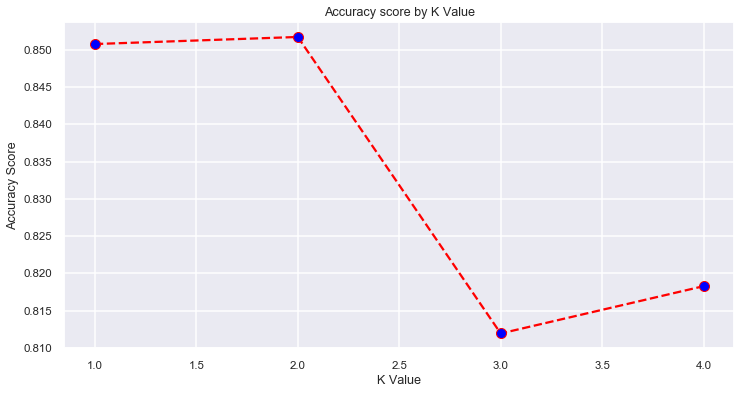

In [42]:
# plot knn results by accuracy
import matplotlib.pyplot as plt  
plt.figure(figsize=(12, 6))  
plt.plot(k_range, k_scores, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Accuracy score by K Value')  
plt.xlabel('K Value')  
plt.ylabel('Accuracy Score') 
plt.show()

### XGboost

In [43]:
# setting xgboost method
xg_clf=xgb.XGBClassifier()

In [44]:
# mean for popular
df['popular'].mean()

0.19762893301985893

In [45]:
# fit x_train, y_train by xgboost method
xg_clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [46]:
# predict x_test and print accuracy and f1 score for xgboost
predictions = xg_clf.predict(X_test)
test_f1 = f1_score(y_test,predictions)
test_acc = accuracy_score(y_test,predictions)
print("F1 Score:",test_f1)
print("Accuracy:",test_acc)

F1 Score: 0.6402388797364086
Accuracy: 0.8252213496073233


In [ ]:
# n estimator 1000 ????   max depth 10?? --> should be 3-4   fix!  

In [67]:
# adjust different hyperparameters to fit xgboost model better
clg_xgb = xgb.XGBClassifier(objectives='binary:logistic' )
param_dist = {'n_estimators':[1000],
              'learning_rate':[0.5],
              'max_depth':[10],
              'colsample_bytree':[0.9],
              'min_child_weight':[2]
             }

In [68]:
# using grid search method to find best hyperparameters
gim = GridSearchCV(estimator=clg_xgb,
                   param_grid=param_dist,
                   scoring='f1',
                   n_jobs=-1,
                   verbose=1,
                   iid=False,
                   cv=5)

In [69]:
# fit x_train, y_train by xgboost method (after grid searach)
gim.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 15.1min finished
/Users/chaoalex/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     objectives='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid=False, n_jobs=-1,
             param_grid={'colsample_bytree': [0.9], 'learning_rate': [0.5],
                         'max_depth': [10],

In [70]:
# print out best hyperparameters
gim.best_params_

{'colsample_bytree': 0.9,
 'learning_rate': 0.5,
 'max_depth': 10,
 'min_child_weight': 2,
 'n_estimators': 1000}

In [85]:
# print accuracy and f1 score for xgboost (after grid searach)
y_pred = gim.predict(X_test)
print("F1 Score:",metrics.f1_score(y_pred, y_test))
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

F1 Score: 0.8716410122619358
Accuracy: 0.9507778500325146


### Random Forest

In [53]:
# setting random forest method and fit x_train, y_train by random forest method 
forest = RandomForestClassifier(n_estimators=200, max_depth=5, criterion='gini', n_jobs=-1,)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [54]:
# predict x_test
y_pred = forest.predict(X_test)

In [55]:
# print accuracy and f1 score for random forest
forest_f1 = f1_score(y_test,y_pred)
forest_acc = accuracy_score(y_test,y_pred)
print("F1 Score:",forest_f1)
print("Accuracy:",forest_acc)

F1 Score: 0.6290508652333509
Accuracy: 0.8230703816717523


In [72]:
# adjust different hyperparameters to fit random forest model better
param_dist = {'n_estimators':[200,300,500],
              'criterion':["gini"],
              'max_depth':[9,10],
              'min_samples_split':[3,4,5],
             }

In [73]:
# using grid search method to find best hyperparameters
g_forest = GridSearchCV(estimator=forest,
                   param_grid=param_dist,
                   scoring='f1',
                   n_jobs=-1,
                   verbose=1,
                   iid=False,
                   cv=5)

In [74]:
# fit x_train, y_train by random forest method (after grid searach)
g_forest.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 12.3min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed: 29.2min finished
/Users/chaoalex/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=5,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=200, n_jobs=-1,
                                              oob_score=False,
                                              random_sta

In [81]:
# print out best hyperparameters
g_forest.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_split': 3,
 'n_estimators': 200}

In [86]:
# print accuracy and f1 score for xgboost (after grid searach)
y_pred = g_forest.predict(X_test)
print("F1 Score:",metrics.f1_score(y_pred, y_test))
print("Accuracy:",metrics.accuracy_score(y_pred, y_test))

F1 Score: 0.6771619581626052
Accuracy: 0.8502326046721025


## Final Model

### XGboost

In [77]:
# best hyperparameters by xgboost method
gim.best_params_

{'colsample_bytree': 0.9,
 'learning_rate': 0.5,
 'max_depth': 10,
 'min_child_weight': 2,
 'n_estimators': 1000}

In [87]:
# best f1 and accuracy score from the chosing model
y_pred = gim.predict(X_test)
print("F1 Score:",metrics.f1_score(y_pred, y_test))
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

F1 Score: 0.8716410122619358
Accuracy: 0.9507778500325146


In [147]:
# best hyperparameters by xgboost method
clg_xgb = xgb.XGBClassifier(objectives='binary:logistic',n_estimators=1000,
              learning_rate=0.5,
              max_depth=10,
              colsample_bytree=0.9,
              min_child_weight=2 )

In [161]:
# rename columns in x_train
name=pd.DataFrame(X_train)
name.columns=df[selection].columns
name

,codeBlockCount,imageCount,linksCount,readingTime,responsesCreatedCount,tagsCount,wordCount,postCount,usersFollowedByCount,usersFollowedCount
0,-0.222311,-0.609138,-0.627613,-0.943763,-0.214611,0.428273,-0.889387,-0.726269,-0.168257,-0.203258
1,0.529341,0.715034,0.157098,0.013085,-0.214611,0.428273,-0.135380,-0.703219,-0.168313,-0.203258
2,-0.222311,-0.443616,-0.627613,-0.634791,-0.214611,0.428273,-0.607918,0.226953,-0.168090,-0.195237
3,-0.222311,-0.609138,-0.540423,-0.512750,-0.214611,-0.909774,-0.427121,-0.589479,-0.168257,-0.201843
4,-0.222311,-0.278095,-0.366043,-0.376024,-0.214611,0.428273,-0.375758,-0.187806,-0.167979,-0.203258
...,...,...,...,...,...,...,...,...,...,...
128325,-0.222311,-0.609138,-0.714803,-0.835531,-0.214611,0.428273,-0.773307,3.521014,-0.118920,-0.203258
128326,-0.222311,-0.443616,2.511228,1.954157,1.151417,-0.909774,2.168760,-0.703492,0.190150,-0.066434
128327,-0.222311,-0.112573,-0.191662,-0.267073,-0.100776,0.428273,-0.299741,-0.403643,-0.154543,-0.178252
128328,0.905167,0.383991,-0.017282,0.632067,0.582239,0.428273,0.569319,-0.187806,-0.161066,-0.200899


In [162]:
# predict x_test
clg_xgb.fit(name, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9, gamma=0,
              learning_rate=0.5, max_delta_step=0, max_depth=10,
              min_child_weight=2, missing=None, n_estimators=1000, n_jobs=1,
              nthread=None, objective='binary:logistic',
              objectives='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=1, verbosity=1)

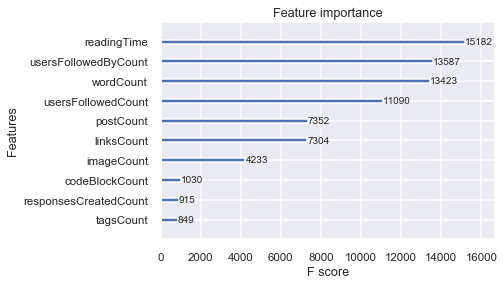

In [163]:
# plot how each feature affects the prediction
plot_importance(clg_xgb,max_num_features=10)